<a href="https://colab.research.google.com/github/mskim-niigatau/EIC_Lab4/blob/master/mod_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
##################
# BPSK Modulation
##################

import numpy as np
import math
import matplotlib.pyplot as plt

m = np.array([1,0,1,1,0,1,1,1,0,0,0,1])      # ビット系列
M = round(m.shape[0])          # シンボル数（BPSK：1ビット/シンボル)

fc = 100;                 # 搬送波周波数 [Hz] 
R  = 100;                 # シンボルレート [symbols/sec]
T  = 1/R;                 # シンボル周期
Fs = R*10;                # サンプリング周波数（シンボル周期の10倍）
Ts = 1/Fs;                # サンプル周期

N  = round(T/Ts);         # シンボル当たりのサンプル数
mm = np.arange(M);
n  = np.arange(M*N);      
t  = n*Ts;                # 時間  
pi = math.pi;

In [30]:
car = np.exp(np.array(1j*2*pi*fc*t));  # 搬送波（1周期/シンボル）
g_t = np.ones(N);          # パルス整形フィルタ

In [31]:
# Modulation

uI = np.zeros(M);
uQ = np.zeros(M);
uI_t = [];
uQ_t = [];

for ii in range(M):
  if m[ii] == 0:
    ph = math.pi       # '0'
  else:
    ph = 0             # '1'            

  # 符号系列
  uI[ii] = math.cos(ph);
  uQ[ii] = math.sin(ph);
      
  # 基底帯域信号
  uI_t = np.hstack((uI_t, g_t*uI[ii]));
  uQ_t = np.hstack((uQ_t, g_t*uQ[ii]));

In [32]:
u   = uI_t+1j*uQ_t;     # 基底帯域信号
s_t = (u*car).real;     # 帯域信号

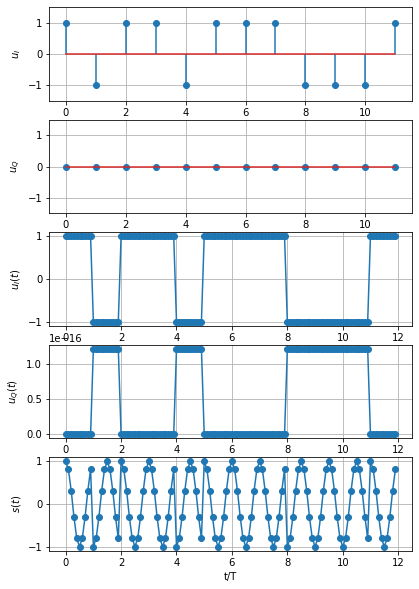

In [36]:
fig = plt.figure(figsize=(6.5,10))

ax1 = fig.add_subplot(511)
ax1.stem(mm, uI,use_line_collection=True)
ax1.set_xlabel("index")
ax1.set_ylabel("$u_I$")
ax1.set_ylim(-1.5,1.5)
ax1.grid("both")

ax2 = fig.add_subplot(512)
ax2.stem(mm, uQ,use_line_collection=True)
ax2.set_xlabel("index")
ax2.set_ylabel("$u_Q$")
ax2.set_ylim(-1.5,1.5)
ax2.grid("both")

ax3 = fig.add_subplot(513)
ax3.plot(t/T, uI_t, '-o')
ax3.set_xlabel("t/T")
ax3.set_ylabel("$u_I(t)$")
#ax3.set_ylim(-1.5,1.5)
ax3.grid("both")

ax4 = fig.add_subplot(514)
ax4.plot(t/T, uQ_t, '-o')
ax4.set_xlabel("t/T")
ax4.set_ylabel("$u_Q(t)$")
#ax4.set_ylim(-1.5,1.5)
ax4.grid("both")

ax5 = fig.add_subplot(515)
ax5.plot(t/T, s_t, '-o')
ax5.set_xlabel("t/T")
ax5.set_ylabel("$s(t)$")
#ax5.set_ylim(-1.5,1.5)
ax5.grid("both")


In [27]:
# De-Modulation

SNR = 10;

rt = s_t + 10**(-SNR/20)*np.random.randn(M*N); #SNR 6dB
rI = rt*2*car.real;
rQ = -rt*2*car.imag;
r_uI = [];
r_uQ = [];
for ii in range(M):
    #print(rI[(ii*N):((ii+1)*N-1)]);
    r_uI = np.append(r_uI, np.mean(rI[(ii*N):((ii+1)*N-1)]));
    r_uQ = np.append(r_uQ, np.mean(rQ[(ii*N):((ii+1)*N-1)]));


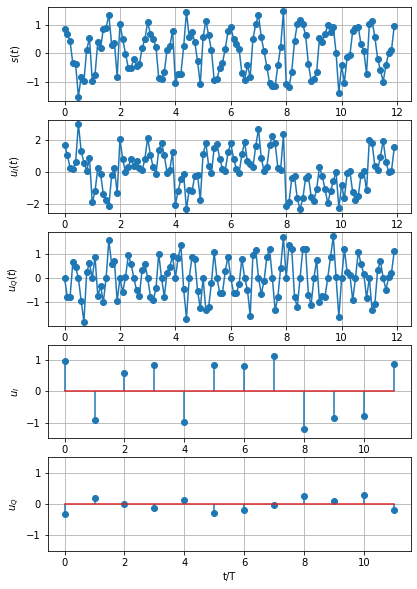

In [39]:
fig = plt.figure(figsize=(6.5,10))

ax1 = fig.add_subplot(511)
ax1.plot(t/T, rt, '-o')
ax1.set_xlabel("t/T")
ax1.set_ylabel("$s(t)$")
#ax1.set_ylim(-1.5,1.5)
ax1.grid("both")

ax2 = fig.add_subplot(512)
ax2.plot(t/T, rI, '-o')
ax2.set_xlabel("t/T")
ax2.set_ylabel("$u_I(t)$")
#ax2.set_ylim(-1.5,1.5)
ax2.grid("both")

ax3 = fig.add_subplot(513)
ax3.plot(t/T, rQ, '-o')
ax3.set_xlabel("t/T")
ax3.set_ylabel("$u_Q(t)$")
#ax3.set_ylim(-1.5,1.5)
ax3.grid("both")

ax4 = fig.add_subplot(514)
ax4.stem(mm, r_uI,use_line_collection=True)
ax4.set_xlabel("t/T")
ax4.set_ylabel("$u_I$")
ax4.set_ylim(-1.5,1.5)
ax4.grid("both")

ax5 = fig.add_subplot(515)
ax5.stem(mm, r_uQ,use_line_collection=True)
ax5.set_xlabel("t/T")
ax5.set_ylabel("$u_Q$")
ax5.set_ylim(-1.5,1.5)
ax5.grid("both")
